In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Analog

Text(0, 0.5, '$X_c(j\\Omega)$')

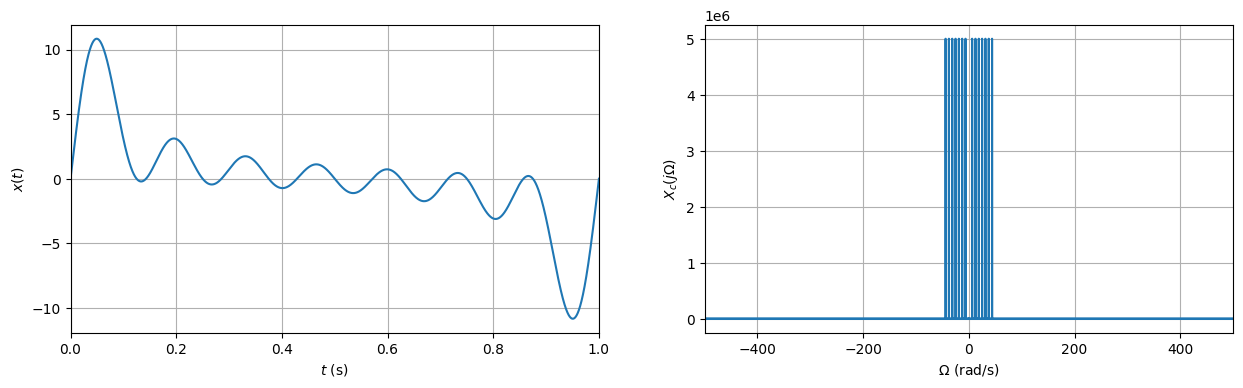

In [2]:
fs = 100000
T = 50
t_analog = np.linspace(0, T, fs*T)

omegas_signal = np.array(list(range(1,8)))*2*np.pi

x_analog = 0*t_analog
for omega in omegas_signal:
    x_analog += 2*np.sin(omega*t_analog)

# plt.plot(t_analog, x_analog)
# plt.xlim((0,1))

X_analog_omega = 2*np.pi*sp.fft.fftfreq(n=x_analog.size, d=1/fs)
X_analog = sp.fft.fft(x_analog)
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].grid()
ax[0].plot(t_analog, x_analog)
ax[0].set_xlim((0, 1))
ax[0].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x(t)$')
ax[1].grid()
ax[1].plot(X_analog_omega, np.abs(X_analog))
ax[1].set_xlim((-500, 500))
ax[1].set_xlabel(r'$\Omega$ (rad/s)')
ax[1].set_ylabel(r'$X_c(j\Omega)$')

# Digital at low samplig rate

Text(0, 0.5, '$X(e^{j\\omega})$')

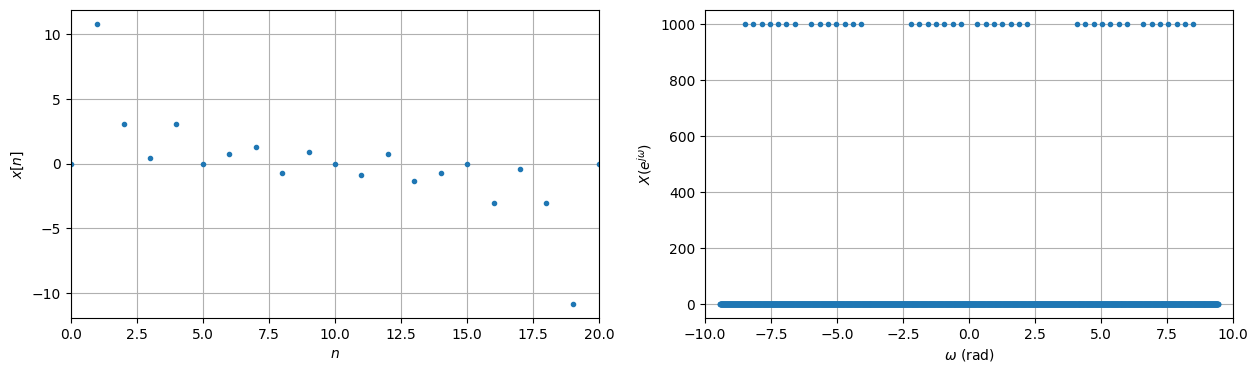

In [3]:
Omega_samplig = 2*np.pi*20
f_sampling = Omega_samplig/(2*np.pi)
x_digital = x_analog[0::int(fs/f_sampling)]


X_digital_omega = 2*np.pi*sp.fft.fftfreq(n=x_digital.size, d=1)
X_digital = sp.fft.fft(x_digital)

# Show one copy each side
X_digital = np.hstack((X_digital, X_digital, X_digital))
X_digital_omega = np.hstack((X_digital_omega, X_digital_omega-2*np.pi, X_digital_omega+2*np.pi))

fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].grid()
ax[0].plot(x_digital, linestyle="", marker='.')
ax[0].set_xlim((0, 1*f_sampling))
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$x[n]$')
ax[1].grid()
ax[1].plot(X_digital_omega, np.abs(X_digital), linestyle="", marker='.')
ax[1].set_xlim((-10, 10))
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel(r'$X(e^{j\omega})$')

## D/A with ZOH

Text(0, 0.5, '$X_c(j\\Omega)$')

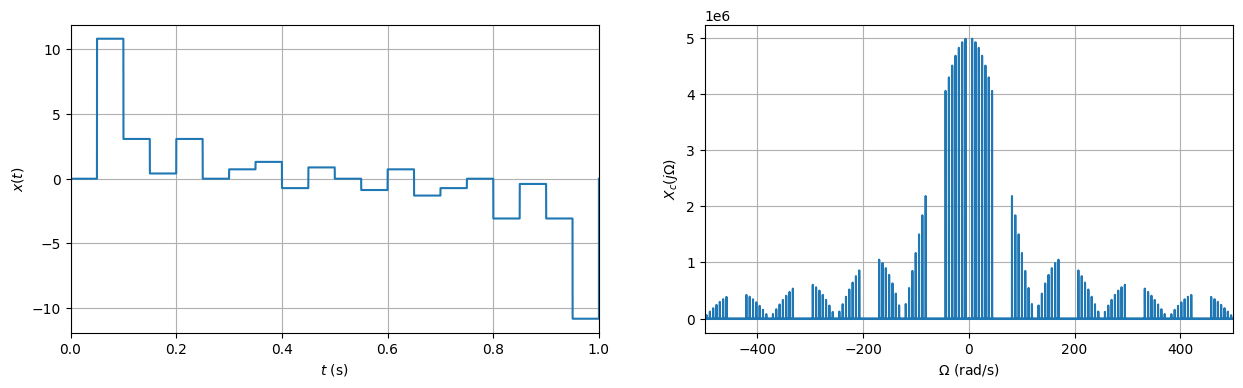

In [4]:
x_analog_out = 0*x_analog

x_analog_out[::int(fs/f_sampling)] = x_digital
for i in range(x_analog_out.size):
    x_analog_out[i] = x_analog_out[i-1] if x_analog_out[i] == 0 else x_analog_out[i]


X_analog_omega = 2*np.pi*sp.fft.fftfreq(n=x_analog_out.size, d=1/fs)
X_analog_out = sp.fft.fft(x_analog_out)
fig, ax = plt.subplots(1, 2, figsize=(15,4))

ax[0].grid()
ax[0].plot(t_analog, x_analog_out)
ax[0].set_xlim((0, 1))
ax[0].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x(t)$')
ax[1].grid()
ax[1].plot(X_analog_omega, np.abs(X_analog_out))
ax[1].set_xlim((-500, 500))
ax[1].set_xlabel(r'$\Omega$ (rad/s)')
ax[1].set_ylabel(r'$X_c(j\Omega)$')

# Up-samplig filling with zeros

Text(0, 0.5, '$\\hat{X}(e^{j\\omega})$')

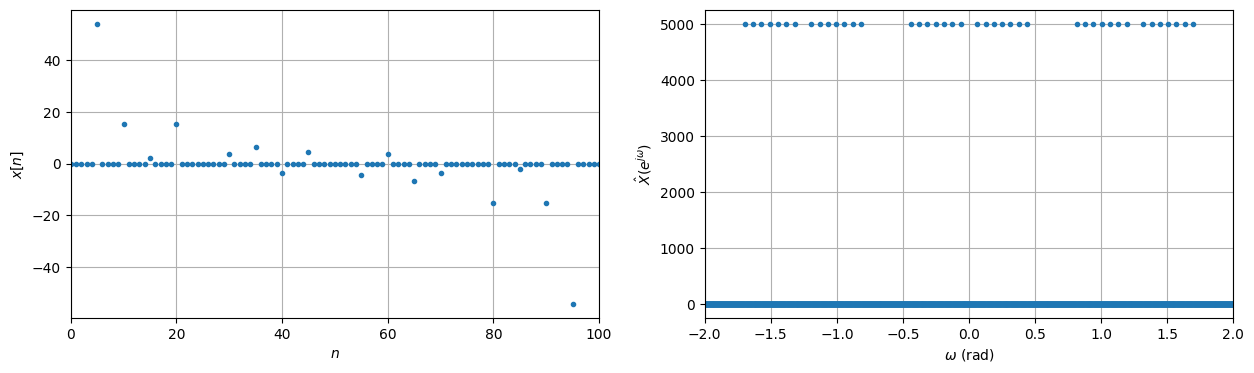

In [5]:
M_upsamplig = 5
Omega_upsamplig = M_upsamplig*Omega_samplig
f_sampling_upsamplig = Omega_upsamplig/(2*np.pi)


x_digital_upsampling = np.zeros(M_upsamplig*x_digital.size)
for i, value in enumerate(x_digital):
    x_digital_upsampling[i*M_upsamplig] = M_upsamplig*x_digital[i]


X_digital_upsampling_omega = 2*np.pi*sp.fft.fftfreq(n=x_digital_upsampling.size, d=1)
X_digital_upsampling = sp.fft.fft(x_digital_upsampling)

# Show one copy each side
X_digital_upsampling = np.hstack((X_digital_upsampling, X_digital_upsampling, X_digital_upsampling))
X_digital_upsampling_omega = np.hstack((X_digital_upsampling_omega, X_digital_upsampling_omega-2*np.pi, X_digital_upsampling_omega+2*np.pi))

fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].grid()
ax[0].plot(x_digital_upsampling, linestyle="", marker='.')
ax[0].set_xlim((0, 1*f_sampling_upsamplig))
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$x[n]$')
ax[1].grid()
ax[1].plot(X_digital_upsampling_omega, np.abs(X_digital_upsampling), linestyle="", marker='.')
ax[1].set_xlim((-10/M_upsamplig, 10/M_upsamplig))
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel(r'$\hat{X}(e^{j\omega})$')

## D/A with ZOH

Text(0, 0.5, '$X_c(j\\Omega)$')

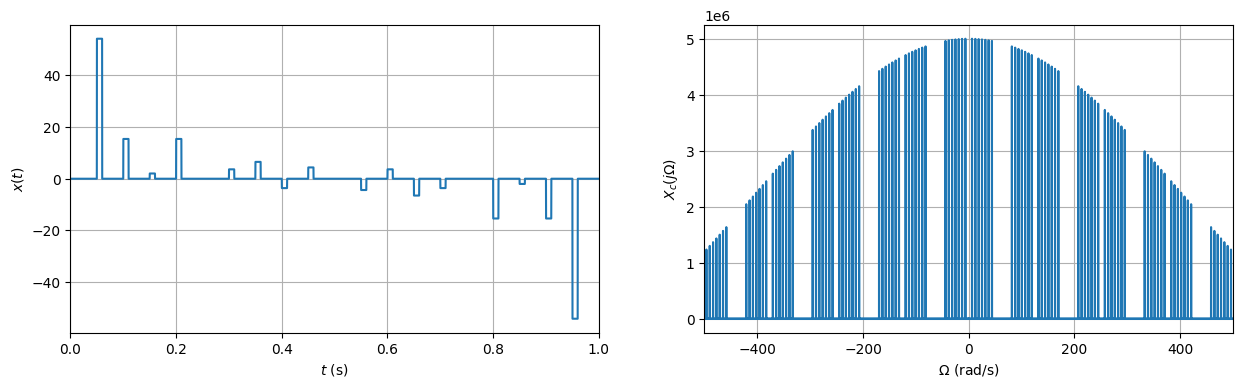

In [6]:
x_analog_out_upsampling = 0*x_analog

for i, value in enumerate(x_digital_upsampling):
    x_analog_out_upsampling[i*int(fs/f_sampling_upsamplig):(i+M_upsamplig)*int(fs/f_sampling_upsamplig)] = value


X_analog_omega_upsampling = 2*np.pi*sp.fft.fftfreq(n=x_analog_out_upsampling.size, d=1/fs)
X_analog_out_upsampling = sp.fft.fft(x_analog_out_upsampling)
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].grid()
ax[0].plot(t_analog, x_analog_out_upsampling)
ax[0].set_xlim((0, 1))
ax[0].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x(t)$')
ax[1].grid()
ax[1].plot(X_analog_omega, np.abs(X_analog_out_upsampling))
ax[1].set_xlim((-500, 500))
ax[1].set_xlabel(r'$\Omega$ (rad/s)')
ax[1].set_ylabel(r'$X_c(j\Omega)$')

# Up-sampling with filter

Text(0, 0.5, '$\\hat{X}(e^{j\\omega})$')

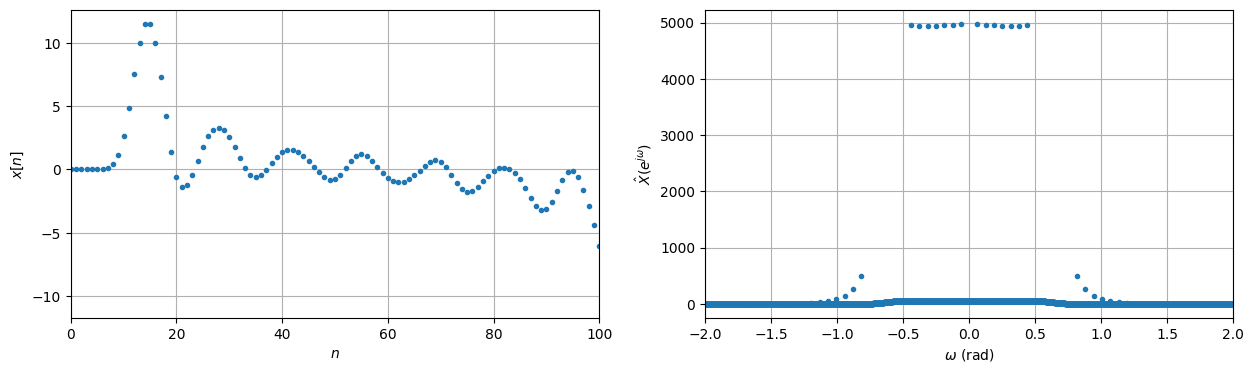

In [7]:
from scipy.signal import butter, lfilter, freqz


M_upsamplig = 5
Omega_upsamplig = M_upsamplig*Omega_samplig
f_sampling_upsamplig = Omega_upsamplig/(2*np.pi)


x_digital_upsampling_filt = np.zeros(M_upsamplig*x_digital.size)
for i, value in enumerate(x_digital):
    x_digital_upsampling_filt[i*M_upsamplig] = M_upsamplig*x_digital[i]


b, a = butter(8, .5*.4, btype='low', analog=False)
x_digital_upsampling_filt = lfilter(b, a, x_digital_upsampling_filt)


X_digital_upsampling_filt_omega = 2*np.pi*sp.fft.fftfreq(n=x_digital_upsampling_filt.size, d=1)
X_digital_upsampling_filt = sp.fft.fft(x_digital_upsampling_filt)

# Show one copy each side
X_digital_upsampling_filt = np.hstack((X_digital_upsampling_filt, X_digital_upsampling_filt, X_digital_upsampling_filt))
X_digital_upsampling_filt_omega = np.hstack((X_digital_upsampling_filt_omega, X_digital_upsampling_filt_omega-2*np.pi, X_digital_upsampling_filt_omega+2*np.pi))

fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].grid()
ax[0].plot(x_digital_upsampling_filt, linestyle="", marker='.')
ax[0].set_xlim((0, 1*f_sampling_upsamplig))
ax[0].set_xlabel(r'$n$')
ax[0].set_ylabel(r'$x[n]$')
ax[1].grid()
ax[1].plot(X_digital_upsampling_filt_omega, np.abs(X_digital_upsampling_filt), linestyle="", marker='.')
ax[1].set_xlim((-10/M_upsamplig, 10/M_upsamplig))
ax[1].set_xlabel(r'$\omega$ (rad)')
ax[1].set_ylabel(r'$\hat{X}(e^{j\omega})$')

Text(0, 0.5, '$X_c(j\\Omega)$')

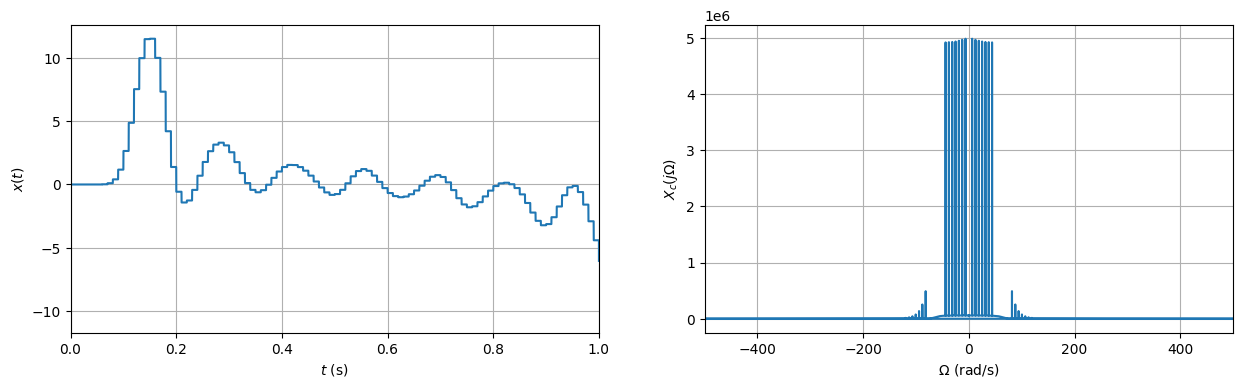

In [8]:
x_analog_out_upsampling_filt = 0*x_analog

for i, value in enumerate(x_digital_upsampling_filt):
    x_analog_out_upsampling_filt[i*int(fs/f_sampling_upsamplig):(i+M_upsamplig)*int(fs/f_sampling_upsamplig)] = value


X_analog_omega_upsampling_filt = 2*np.pi*sp.fft.fftfreq(n=x_analog_out_upsampling_filt.size, d=1/fs)
X_analog_out_upsampling_filt = sp.fft.fft(x_analog_out_upsampling_filt)
fig, ax = plt.subplots(1, 2, figsize=(15,4))
ax[0].grid()
ax[0].plot(t_analog, x_analog_out_upsampling_filt)
ax[0].set_xlim((0, 1))
ax[0].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x(t)$')
ax[1].grid()
ax[1].plot(X_analog_omega, np.abs(X_analog_out_upsampling_filt))
ax[1].set_xlim((-500, 500))
ax[1].set_xlabel(r'$\Omega$ (rad/s)')
ax[1].set_ylabel(r'$X_c(j\Omega)$')

# Plots!

## Analog original

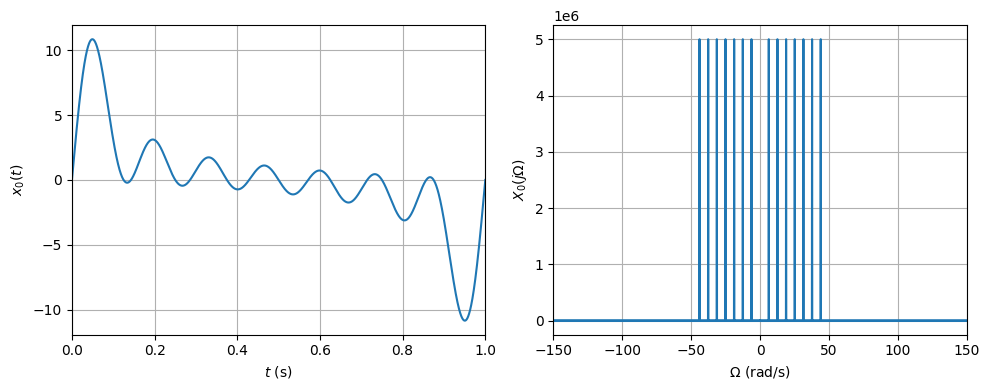

In [12]:
Omega_lims = (-7.5*f_sampling, 7.5*f_sampling)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(t_analog, x_analog)
ax[0].set_xlim((0, 1))
ax[0].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x_0(t)$')
ax[0].grid()
ax[1].plot(X_analog_omega, np.abs(X_analog))
ax[1].set_xlim(Omega_lims)
ax[1].set_xlabel(r'$\Omega$ (rad/s)')
ax[1].set_ylabel(r'$X_0(j\Omega)$')
ax[1].grid()
plt.tight_layout()
plt.show()
fig.savefig('upsampling1.png')


## Upsampling filling with zeros

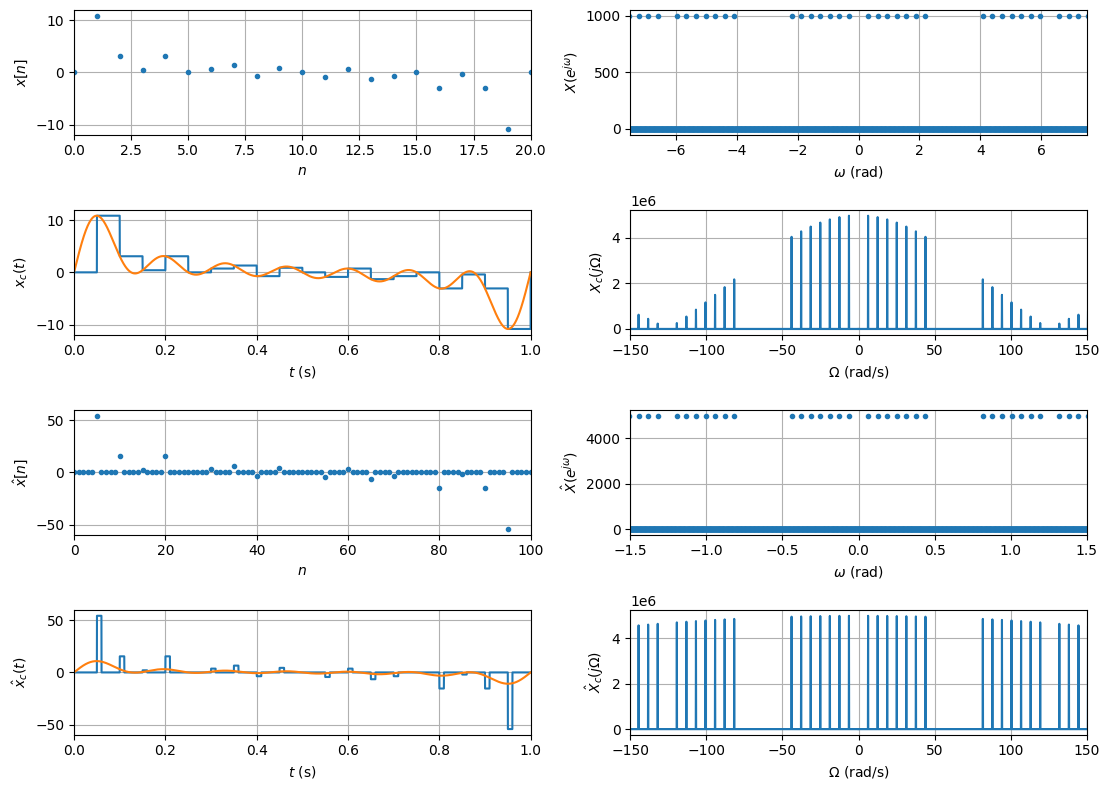

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(14*.8,10*.8))
ax[0, 0].grid()
ax[0, 0].plot(x_digital, linestyle="", marker='.')
ax[0, 0].set_xlim((0, 1*f_sampling))
ax[0, 0].set_xlabel(r'$n$')
ax[0, 0].set_ylabel(r'$x[n]$')
ax[0, 1].grid()
ax[0, 1].plot(X_digital_omega, np.abs(X_digital), linestyle="", marker='.')
ax[0, 1].set_xlim((-7.5, 7.5))
ax[0, 1].set_xlabel(r'$\omega$ (rad)')
ax[0, 1].set_ylabel(r'$X(e^{j\omega})$')

ax[1, 0].grid()
ax[1, 0].plot(t_analog, x_analog_out)
ax[1, 0].set_xlim((0, 1))
ax[1, 0].set_xlabel(r'$t$ (s)')
ax[1, 0].set_ylabel(r'$x_c(t)$')
ax[1, 1].grid()
ax[1, 1].plot(X_analog_omega, np.abs(X_analog_out))
ax[1, 0].plot(t_analog, x_analog)
ax[1, 1].set_xlim(Omega_lims)
ax[1, 1].set_xlabel(r'$\Omega$ (rad/s)')
ax[1, 1].set_ylabel(r'$X_c(j\Omega)$')

ax[2, 0].grid()
ax[2, 0].plot(x_digital_upsampling, linestyle="", marker='.')
ax[2, 0].set_xlim((0, 1*f_sampling_upsamplig))
ax[2, 0].set_xlabel(r'$n$')
ax[2, 0].set_ylabel(r'$\hat{x}[n]$')
ax[2, 1].grid()
ax[2, 1].plot(X_digital_upsampling_omega, np.abs(X_digital_upsampling), linestyle="", marker='.')
ax[2, 1].set_xlim((-7.5/M_upsamplig, 7.5/M_upsamplig))
ax[2, 1].set_xlabel(r'$\omega$ (rad)')
ax[2, 1].set_ylabel(r'$\hat{X}(e^{j\omega})$')

ax[3, 0].grid()
ax[3, 0].plot(t_analog, x_analog_out_upsampling)
ax[3, 0].plot(t_analog, x_analog)
ax[3, 0].set_xlim((0, 1))
ax[3, 0].set_xlabel(r'$t$ (s)')
ax[3, 0].set_ylabel(r'$\hat{x}_c(t)$')
ax[3, 1].grid()
ax[3, 1].plot(X_analog_omega, np.abs(X_analog_out_upsampling))
ax[3, 1].set_xlim(Omega_lims)
ax[3, 1].set_xlabel(r'$\Omega$ (rad/s)')
ax[3, 1].set_ylabel(r'$\hat{X}_c(j\Omega)$')
plt.tight_layout()
plt.show()
fig.savefig('upsampling2.png')

## Up-sampling with filter

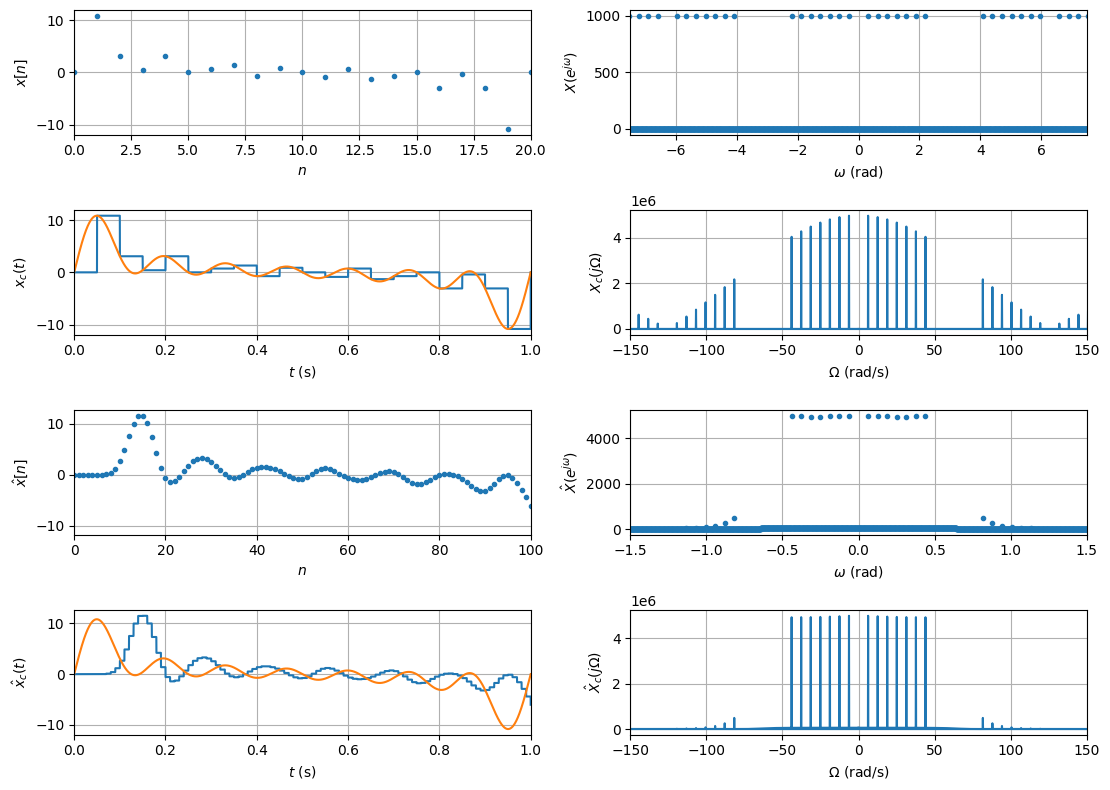

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(14*.8,10*.8))
ax[0, 0].grid()
ax[0, 0].plot(x_digital, linestyle="", marker='.')
ax[0, 0].set_xlim((0, 1*f_sampling))
ax[0, 0].set_xlabel(r'$n$')
ax[0, 0].set_ylabel(r'$x[n]$')
ax[0, 1].grid()
ax[0, 1].plot(X_digital_omega, np.abs(X_digital), linestyle="", marker='.')
ax[0, 1].set_xlim((-7.5, 7.5))
ax[0, 1].set_xlabel(r'$\omega$ (rad)')
ax[0, 1].set_ylabel(r'$X(e^{j\omega})$')

ax[1, 0].grid()
ax[1, 0].plot(t_analog, x_analog_out)
ax[1, 0].plot(t_analog, x_analog)
ax[1, 0].set_xlim((0, 1))
ax[1, 0].set_xlabel(r'$t$ (s)')
ax[1, 0].set_ylabel(r'$x_c(t)$')
ax[1, 1].grid()
ax[1, 1].plot(X_analog_omega, np.abs(X_analog_out))
ax[1, 1].set_xlim(Omega_lims)
ax[1, 1].set_xlabel(r'$\Omega$ (rad/s)')
ax[1, 1].set_ylabel(r'$X_c(j\Omega)$')

ax[2, 0].grid()
ax[2, 0].plot(x_digital_upsampling_filt, linestyle="", marker='.')
ax[2, 0].set_xlim((0, 1*f_sampling_upsamplig))
ax[2, 0].set_xlabel(r'$n$')
ax[2, 0].set_ylabel(r'$\hat{x}[n]$')
ax[2, 1].grid()
ax[2, 1].plot(X_digital_upsampling_omega, np.abs(X_digital_upsampling_filt), linestyle="", marker='.')
ax[2, 1].set_xlim((-7.5/M_upsamplig, 7.5/M_upsamplig))
ax[2, 1].set_xlabel(r'$\omega$ (rad)')
ax[2, 1].set_ylabel(r'$\hat{X}(e^{j\omega})$')

ax[3, 0].grid()
ax[3, 0].plot(t_analog, x_analog_out_upsampling_filt)
ax[3, 0].plot(t_analog, x_analog)
ax[3, 0].set_xlim((0, 1))
ax[3, 0].set_xlabel(r'$t$ (s)')
ax[3, 0].set_ylabel(r'$\hat{x}_c(t)$')
ax[3, 1].grid()
ax[3, 1].plot(X_analog_omega, np.abs(X_analog_out_upsampling_filt))
ax[3, 1].set_xlim(Omega_lims)
ax[3, 1].set_xlabel(r'$\Omega$ (rad/s)')
ax[3, 1].set_ylabel(r'$\hat{X}_c(j\Omega)$')
plt.tight_layout()
plt.show()
fig.savefig('upsampling2_filt.png')